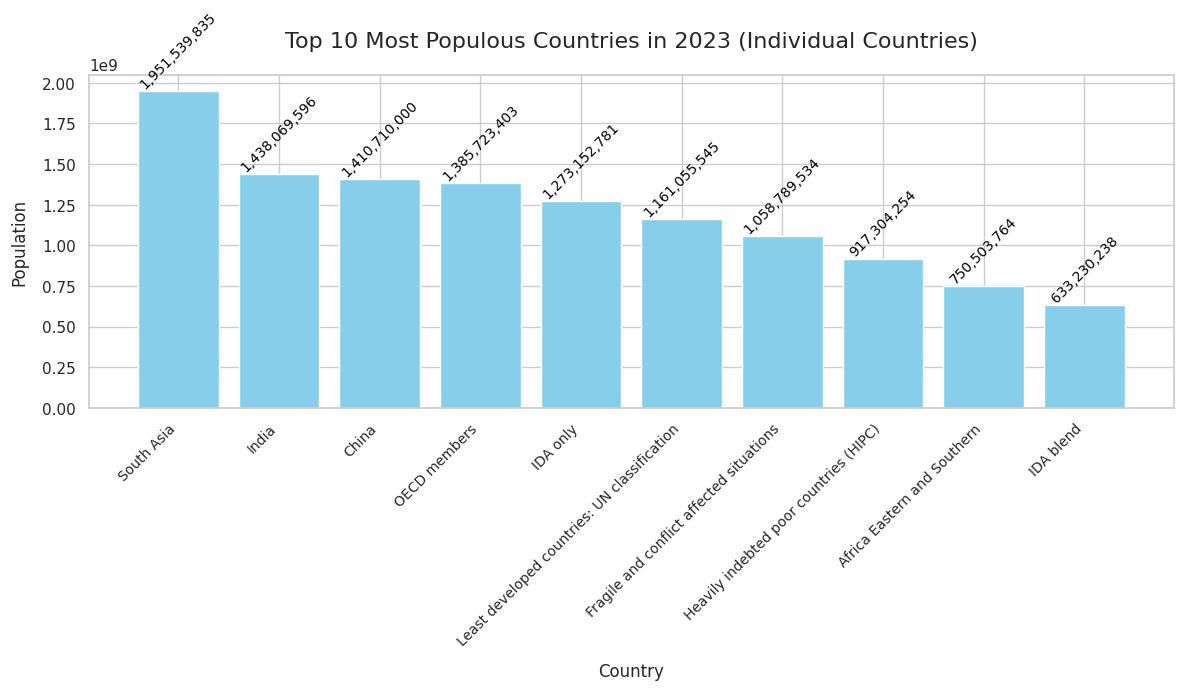

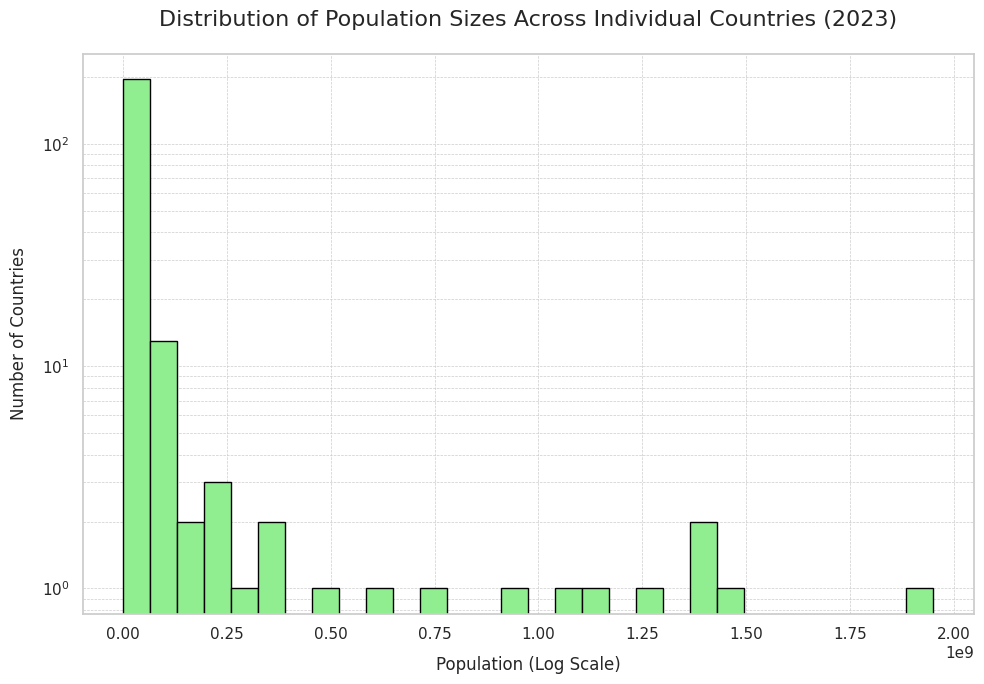

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_theme(style="whitegrid", palette="muted")
data = pd.read_csv('API_SP.POP.TOTL_DS2_en_csv_v2_900.csv', skiprows=4)

data_2023 = data[['Country Name', 'Country Code', '2023']].dropna()
filtered_data_2023 = data_2023[~data_2023['Country Name'].str.contains(
    'income|World|IBRD|demographic|East Asia|total|Euro|Sub-Saharan|Arab|Latin|Middle', case=False)]

top_10_countries = filtered_data_2023.sort_values(by='2023', ascending=False).head(10)

plt.figure(figsize=(12, 7))
bars = plt.bar(top_10_countries['Country Name'], top_10_countries['2023'], color='skyblue')

plt.title('Top 10 Most Populous Countries in 2023 (Individual Countries)', fontsize=16, pad=20)
plt.xlabel('Country', fontsize=12, labelpad=10)
plt.ylabel('Population', fontsize=12, labelpad=10)

plt.xticks(rotation=45, ha='right', fontsize=10)
plt.subplots_adjust(bottom=0.2)

for bar, pop in zip(bars, top_10_countries['2023']):
    plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height(), f'{int(pop):,}',
             ha='center', va='bottom', fontsize=10, color='black', rotation=45)

plt.tight_layout()
plt.show()

plt.figure(figsize=(10, 7))
plt.hist(filtered_data_2023['2023'], bins=30, color='lightgreen', edgecolor='black', log=True)

plt.title('Distribution of Population Sizes Across Individual Countries (2023)', fontsize=16, pad=20)
plt.xlabel('Population (Log Scale)', fontsize=12, labelpad=10)
plt.ylabel('Number of Countries', fontsize=12, labelpad=10)

plt.grid(True, which="both", linestyle="--", linewidth=0.5)
plt.tight_layout()
plt.show()
